## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

Data source: https://archive.ics.uci.edu/ml/datasets/wine+quality

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [7]:
# importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn

## **Data Exploration, Partionining and Preprocessing**

      fixed acidity  volatile acidity  ...  alcohol  quality_binary
0               7.4             0.700  ...      9.4               0
1               7.8             0.880  ...      9.8               0
2               7.8             0.760  ...      9.8               0
3              11.2             0.280  ...      9.8               1
4               7.4             0.700  ...      9.4               0
...             ...               ...  ...      ...             ...
1594            6.2             0.600  ...     10.5               0
1595            5.9             0.550  ...     11.2               1
1596            6.3             0.510  ...     11.0               1
1597            5.9             0.645  ...     10.2               0
1598            6.0             0.310  ...     11.0               1

[1599 rows x 12 columns]
Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur 

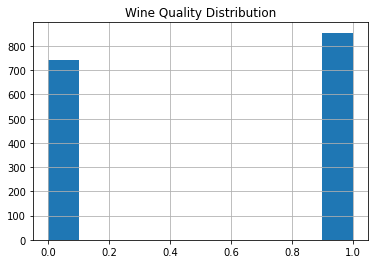

In [9]:
# reading in and printing the data
data = pd.read_csv("/content/winequality-red_Binary.csv")
data = pd.DataFrame(data)
print(data)
# target variable identified as "Quality"
# target variable is categorical, suggesting a logistic regression is best

# checking for missing values -- none found
print("Missing Values:")
print(data.isnull().sum())

# getting statistical overview of data
print(data.describe())

# getting distribution of the 'Quality'
# slightly skewed right, but pretty close to standard normal distribution
data.quality_binary.hist().set_title("Wine Quality Distribution")

# normalizing data and creating a new DataFrame for the normalized data
scaler = MinMaxScaler(feature_range=(0, 1))
normalData = scaler.fit_transform(data)
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol', 'quality_binary']
normalData = pd.DataFrame(normalData, columns=cols)

# splitting the normalized data into features and target
X = normalData.iloc[:,:-1]
y = normalData.iloc[:, -1:]

# partitioning the data into training and test sets; using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

                      fixed acidity  volatile acidity  ...   alcohol  quality_binary
fixed acidity              1.000000         -0.256131  ... -0.061668        0.095093
volatile acidity          -0.256131          1.000000  ... -0.202288       -0.321441
citric acid                0.671703         -0.552496  ...  0.109903        0.159129
residual sugar             0.114777          0.001918  ...  0.042075       -0.002160
chlorides                  0.093705          0.061298  ... -0.221141       -0.109494
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408       -0.061757
total sulfur dioxide      -0.113181          0.076470  ... -0.205654       -0.231963
density                    0.668047          0.022026  ... -0.496180       -0.159110
pH                        -0.682978          0.234937  ...  0.205633       -0.003264
sulphates                  0.183006         -0.260987  ...  0.093595        0.218072
alcohol                   -0.061668         -0.202288  ...  1.000

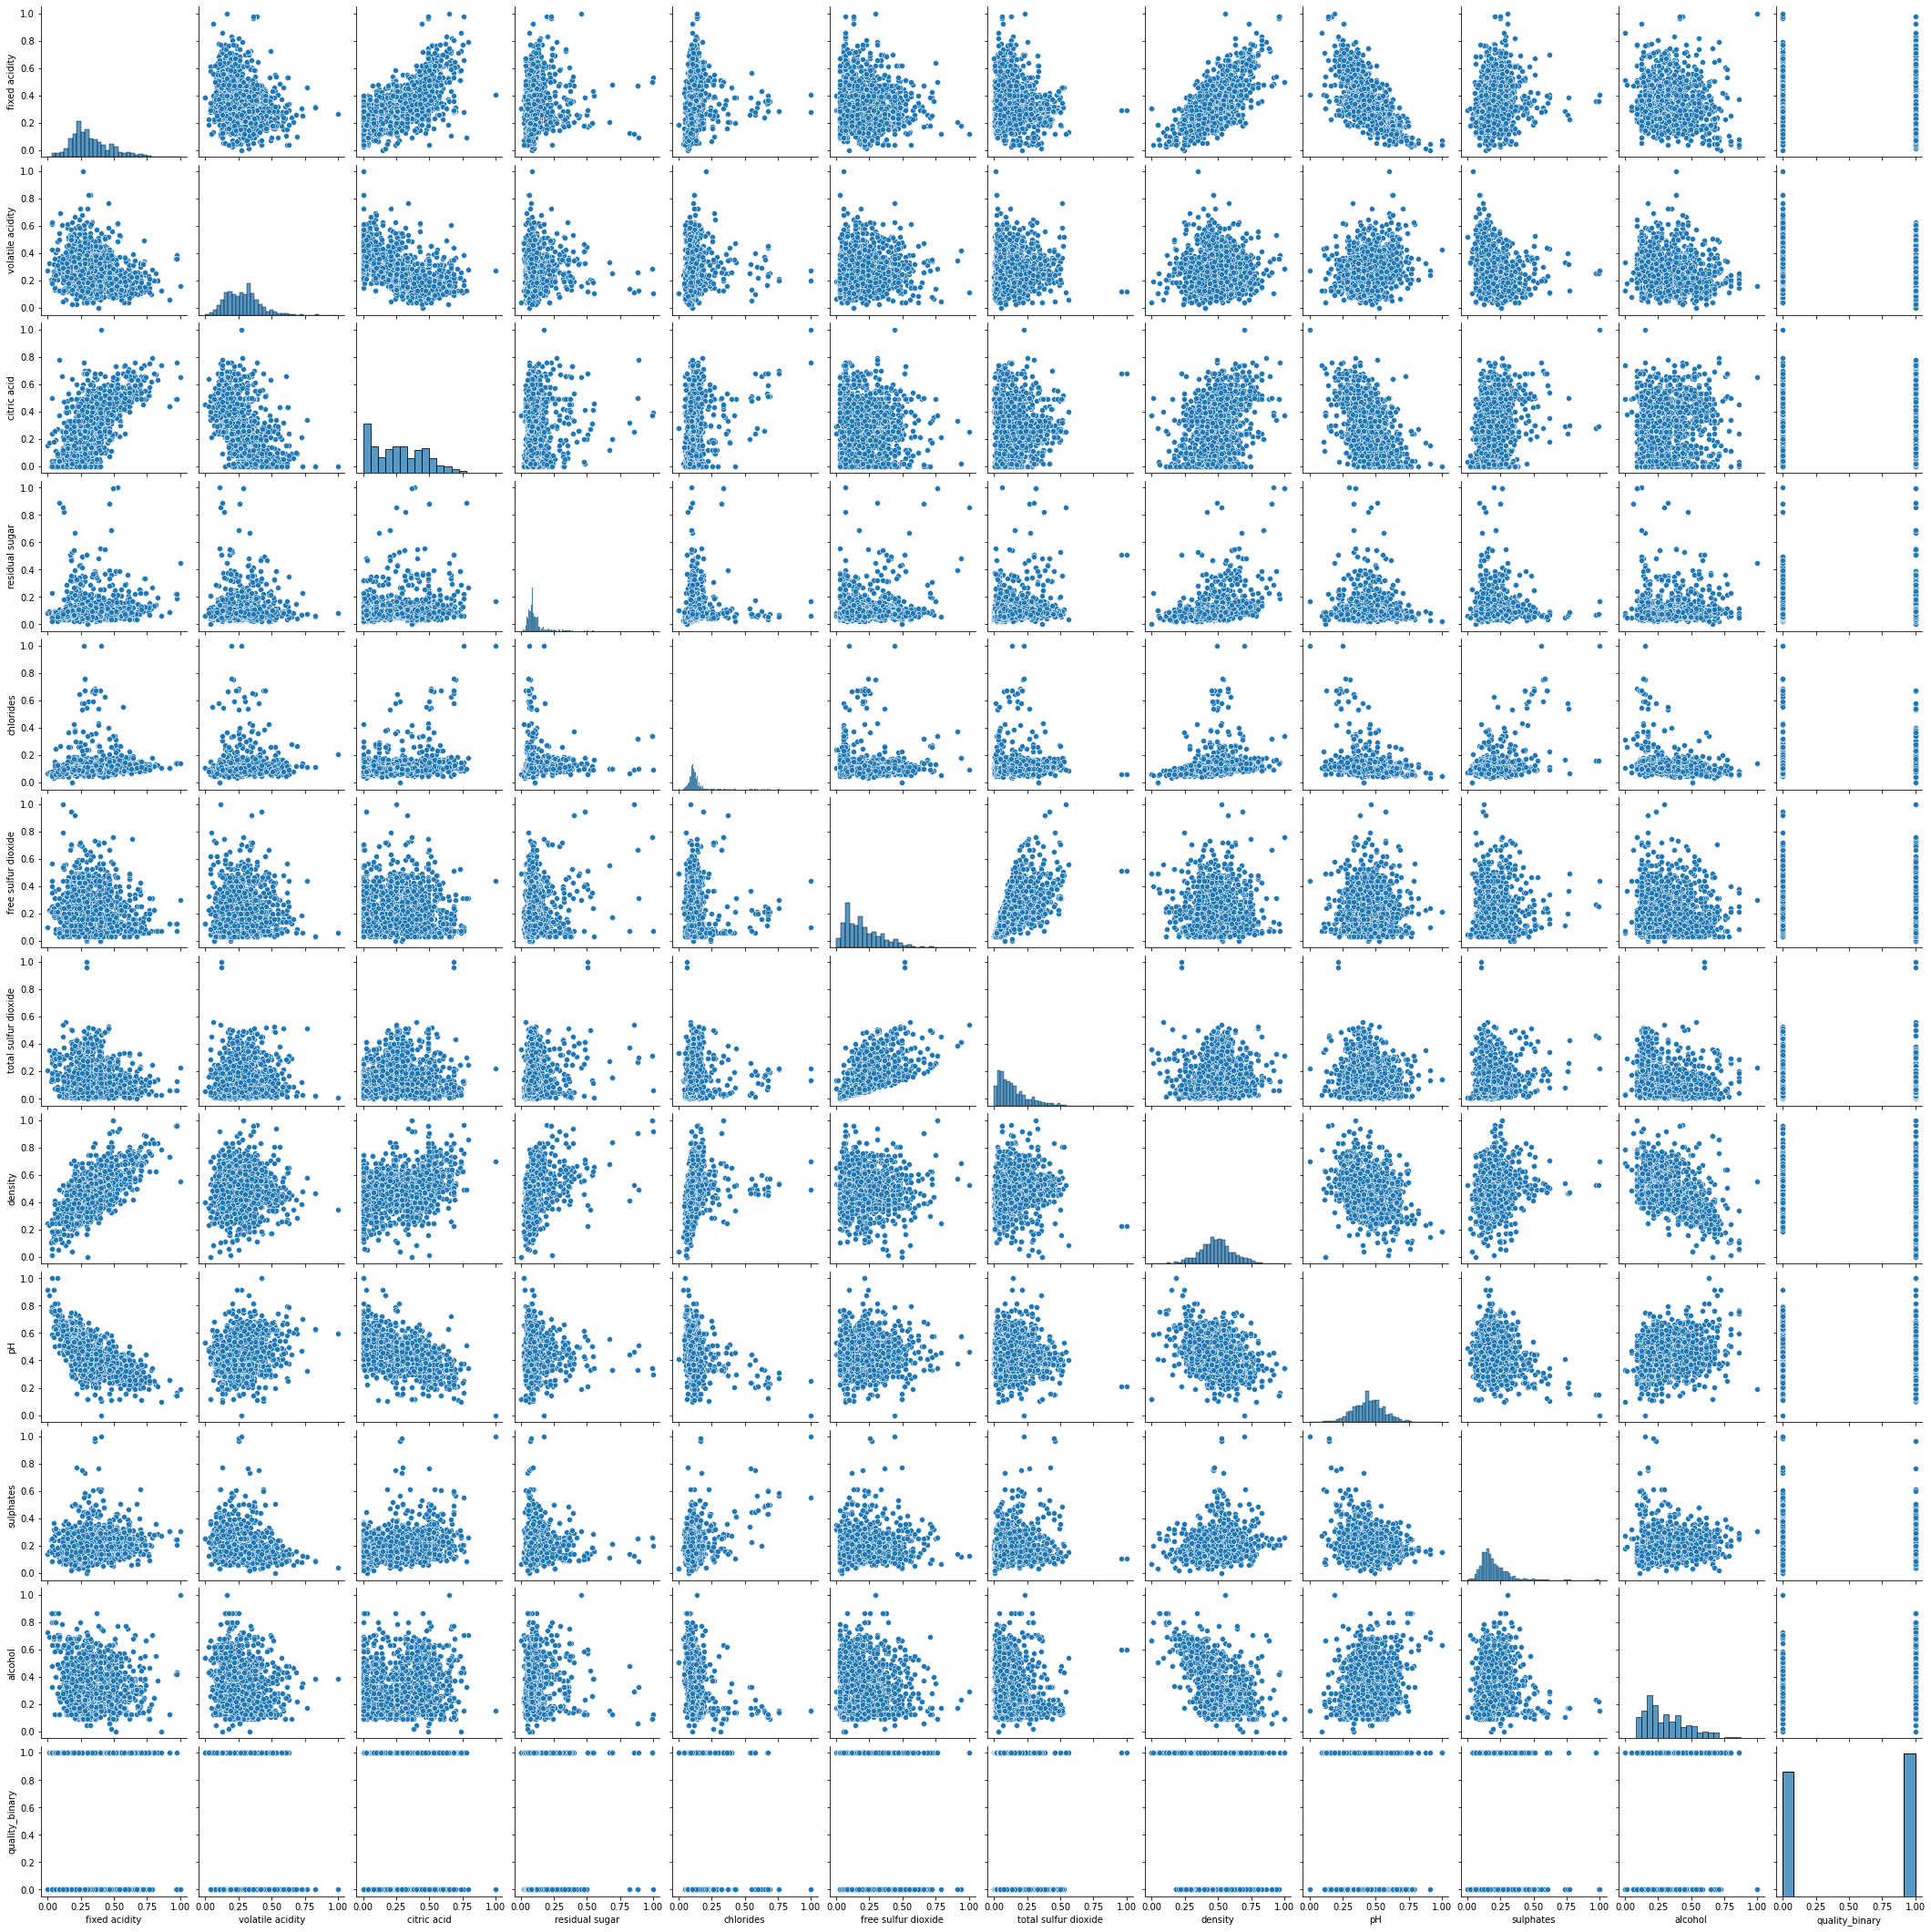

In [17]:
# Using correlation matrix and pairplot to get an overview of variable correlation
print(normalData.corr())

sb.pairplot(normalData)
plt.show()

# **Logistic Regression**

In [10]:
# fitting the Logistic Regression model
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)

# making predictions
y_pred = logReg.predict(X_test)

# evaluating the performance of the model
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(cnf_matrix)
logistic_acc = metrics.accuracy_score(Y_test, y_pred)

# printing the accuracy score
print('Accuracy Score:', logistic_acc)

[[178  45]
 [ 69 188]]
Accuracy Score: 0.7625


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Bagging Model**

In [11]:
# fitting the bagging model
model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state = 42)
model_bagging.fit(X_train, Y_train)

# making predictions
pred_bagging = model_bagging.predict(X_test)

# finding and printing accuracy score
acc_bagging = accuracy_score(Y_test, pred_bagging)
print(' Bagging Model Accuracy = ', acc_bagging)


 Bagging Model Accuracy =  0.7854166666666667


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Boosting Model**

In [18]:
# fitting the boosting model
base_est = DecisionTreeClassifier(max_depth=5)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost.fit(X_train, Y_train)

# finding accuracy score of the predictions
boosting_acc = accuracy_score(Y_test, ada_boost.predict(X_test))
print("Boosting Model Accuracy", boosting_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Boosting Model Accuracy 0.8020833333333334


# **Random Forest**

In [20]:
# fitting the Random Forest model
model_rf = RandomForestClassifier(n_estimators=200, criterion="entropy", max_features=11, random_state=10)
model_rf.fit(X_train, Y_train)

# making predictions and finding accuracy
predict_rf = model_rf.predict(X_test)
rf_acc = accuracy_score(Y_test, predict_rf)
print("Random Forest Accuracy:", rf_acc)

# finding the feature importances
feature_importances = model_rf.feature_importances_
features = X_train.columns

# creating new DataFrame to store feature importances
dfImportances = pd.DataFrame({'features': features, 'importance': feature_importances})

# sorting feature importances and printing the top 5
dfImportances = dfImportances.sort_values(by='importance', ascending=False)
print(dfImportances.iloc[0:5, :])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Accuracy: 0.8291666666666667
                features  importance
10               alcohol    0.217976
9              sulphates    0.129682
1       volatile acidity    0.102215
6   total sulfur dioxide    0.099122
4              chlorides    0.078250


# **Voting Ensemble for Classification**

In [14]:
# creating an ensemble of models
rfClf = RandomForestClassifier(n_estimators=200) # 500 trees. 
svmClf = SVC(probability=True) # probability calculation
logClf = LogisticRegression()
dtClf = DecisionTreeClassifier(max_depth=4)

# fitting the ensemble
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf), ('dtClf', dtClf)], voting='soft') 

# train the ensemble and making predictions
clf2.fit(X_train, Y_train)
clf2_pred = clf2.predict(X_test)

# finding and printing accuracy score
voting_acc = accuracy_score(Y_test, clf2_pred)
print('Accuracy score', voting_acc )

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score 0.7625


# **Summary Visualizations**

                 Model     Score
0  Logistic Regression  0.762500
1              Bagging  0.785417
2             Boosting  0.770833
3        Random Forest  0.829167
4      Voting Ensemble  0.762500


Text(0.5, 1.0, 'Model Accuracy Scores')

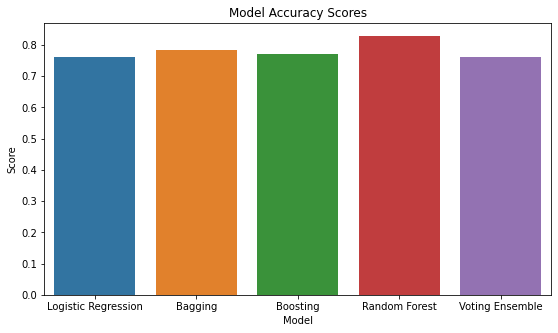

In [15]:
# creating dictionary to store accuracy score of different models
scoreDict = {"Logistic Regression":logistic_acc, "Bagging":acc_bagging, "Boosting":boosting_acc, "Random Forest":rf_acc, "Voting Ensemble":voting_acc}

# creating DataFrame for accuracy scores
scoresDf = pd.DataFrame(list(scoreDict.items()),columns=['Model','Score'])
print(scoresDf)

# plotting the model accuracy scores
fig2 = fig = plt.figure(figsize=[20,5])
ax1 = fig.add_subplot(1, 2, 1)
sn.barplot(data=scoresDf, x='Model', y='Score', ax=ax1)
ax1.set_title("Model Accuracy Scores")

Text(0, 0.5, 'Importance')

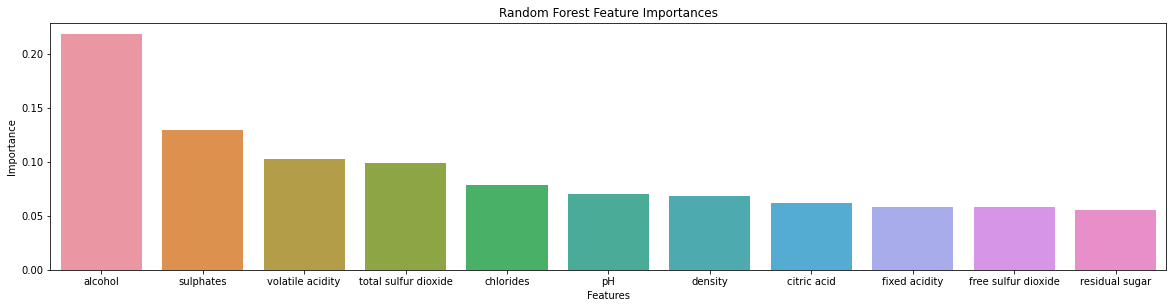

In [16]:
# plotting results of feature importances
fig2 = fig = plt.figure(figsize=[20,10])
ax2 = fig.add_subplot(2,1,1)
sn.barplot(data=dfImportances, x='features', y='importance', ax=ax2)
ax2.set_title("Random Forest Feature Importances")
ax2.set_xlabel('Features')
ax2.set_ylabel('Importance')